# 正文

# FRM模型分析

RFM模型是衡量客户价值和客户创利能力的重要工具和手段，该模型通过一个客户的最近一次消费时间、消费频率、消费金额三项指标来描述该客户的价值状况。在电商领域，RFM模型可帮助企业了解客户的购买行为和购买偏好，从而识别高价值客户、潜在回头客或低活跃度用户。这有助于电商企业定制个性化的营销策略。  

RFM模型通过三个关键指标来描述客户的价值状况，这三个指标分别是：  

- **R（Recency）**：最近一次消费时间。它表示用户最后一次下单时间距今天有多长时间。这个指标与用户流失和复购直接相关，如果客户最近消费过，那么他们更有可能再次消费。  
- **F（Frequency）**：消费频率。它表示用户在固定的时间段内消费了多少次。这个指标反映了用户的消费活跃度，消费频率越高的客户，对商家的忠诚度通常也越高。  
- **M（Monetary）**：消费金额。它表示用户在固定的周期内在平台上花费了多少钱。这个指标直接反映了用户对公司贡献的价值，消费金额越高的客户，通常被认为价值越大。  

这三个指标共同构成了RFM模型，帮助商家更好地理解和评估客户的价值，从而制定更精准的营销策略，提高客户留存率，促进客户消费，最终实现业务增长。同时，通过RFM模型，企业可以将客户进行细分，针对不同群体的客户采取不同的营销策略，实现精准营销。

## 1.数据处理  

 **Pandas数据处理**：针对RFM模型的特点，我们将细致讲解如何准备和处理数据，以适应后续的数值计算。

首先，导入用户下单数据，先预览前5行数据都包含哪些数据字段。

In [1]:
import pandas as pd 
data = pd.read_csv( r"C:/Users/曾亮亮/Desktop/双十一电商数据分析/用户下单数据.csv",engine='python',encoding='gbk') 
data.head()

,用户ID,用户出生日期,性别,婚姻状况,文化程度,下单时间,订单ID,交易金额
0,6414111,1991/8/24,男,已婚,本科,2020/1/1 17:41,1000595826,402.765811
1,6516117,1983/7/21,女,已婚,博士,2021/10/15 22:47,1000610643,545.273062
2,6714112,1986/6/21,女,已婚,博士,2020/11/22 09:45,1001934364,256.716973
3,5311117,1978/5/25,女,未婚,大专,2021/3/26 11:53,1007749907,275.547080
4,4316113,1979/8/1,男,未婚,大专,2021/7/10 18:59,1007770144,1023.500156


### 1.1数据信息查看

In [2]:
data.tail()#预览尾部的5行数据

,用户ID,用户出生日期,性别,婚姻状况,文化程度,下单时间,订单ID,交易金额
4995,6518114,1984/2/28,女,已婚,博士,2023/5/22 19:11,8991789286,703.983370
4996,3615116,1977/5/11,女,未婚,中专,2023/1/19 05:33,8993443974,468.703603
4997,4212112,1987/9/6,女,已婚,中专,2022/6/13 11:03,8993812802,530.658640
4998,4812120,1970/4/29,女,已婚,本科,2021/11/4 07:16,8993866163,605.657681
4999,5112117,1993/9/24,男,未婚,大专,2020/12/18 21:37,8997660647,254.759645


In [3]:
##查看数据情况  
data.shape

(5000, 8)

In [4]:
#查看是否有缺失值
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   用户ID    5000 non-null   int64  
 1   用户出生日期  5000 non-null   object 
 2   性别      5000 non-null   object 
 3   婚姻状况    5000 non-null   object 
 4   文化程度    5000 non-null   object 
 5   下单时间    5000 non-null   object 
 6   订单ID    5000 non-null   int64  
 7   交易金额    5000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 312.6+ KB


代码运行后每个数据字段均包含5000个非空值数据，表明数据没有缺失值，不需要做缺失值数据填充。

### 1.2数据类型转换

In [5]:
#以及查看数据类型 
data.dtypes

用户ID        int64
用户出生日期     object
性别         object
婚姻状况       object
文化程度       object
下单时间       object
订单ID        int64
交易金额      float64
dtype: object

查看数据类型发现下单时间的数据类型是object，需要将其转化为日期类型，然后，根据交易日期，计算出每次交易距今的间隔天数。

In [ ]:
# 将交易日期处理为日期数据类型  
data['下单时间'] = pd.to_datetime(data['下单时间'], errors='coerce')


用户ID               int64
用户出生日期            object
性别                object
婚姻状况              object
文化程度              object
下单时间      datetime64[ns]
订单ID               int64
交易金额             float64
间隔天数               int64
dtype: object

### 1.3计算间隔天数

In [ ]:
# 假设2023-06-05是计算当天，求交易日期至计算当天的距离天数  
data['间隔天数'] = pd.to_datetime('2023-06-05') - data['下单时间']

# 从时间距离中获取天数  
data['间隔天数'] = data['间隔天数'].dt.days
data.head()

,用户ID,用户出生日期,性别,婚姻状况,文化程度,下单时间,订单ID,交易金额,间隔天数
0,6414111,1991/8/24,男,已婚,本科,2020-01-01 17:41:00,1000595826,402.765811,1250
1,6516117,1983/7/21,女,已婚,博士,2021-10-15 22:47:00,1000610643,545.273062,597
2,6714112,1986/6/21,女,已婚,博士,2020-11-22 09:45:00,1001934364,256.716973,924
3,5311117,1978/5/25,女,未婚,大专,2021-03-26 11:53:00,1007749907,275.547080,800
4,4316113,1979/8/1,男,未婚,大专,2021-07-10 18:59:00,1007770144,1023.500156,694


## 2.数值计算  

**Pandas数值计算**：根据RFM模型的要求，我们将使用Pandas进行数值计算，包括最近一次消费、消费频率和消费金额的计算。

### 2.1计算R、F、M值

计算R、F、M的值，以用户ID作为分组列，间隔天数、订单ID、支付金额分别为聚合列，分别求最小值、计数、求和，得出结果。

In [19]:
# 统计每个客户距离指定日期有多久没有消费了，即找出最小的最近消费距离  
R = data.groupby(by=['用户ID'],as_index=False)['间隔天数'].agg('min')
R.sample(10)

,用户ID,间隔天数
540,4011118,688
856,4417120,198
766,4316111,59
1161,4820117,161
0,3211111,230
1901,5918112,119
146,3412112,1050
210,3511119,1131
2090,6216112,267
293,3615119,77


In [22]:
# 统计每个客户交易的总次数，即对订单ID计数  
F = data.groupby(by=['用户ID'],as_index=False)['订单ID'].agg('count')
F.sample(10)

,用户ID,订单ID
1803,5812120,1
1561,5417111,2
668,4120114,3
426,3814119,2
1748,5714119,4
1414,5215119,1
292,3615118,2
1669,5611120,1
58,3219116,1
1536,5413118,2


In [23]:
# 统计每个客户交易的总额，即对每次的交易金额求和  
M = data.groupby(by=['用户ID'],as_index=False)['交易金额'].agg('sum')
M.sample(10)

,用户ID,交易金额
1099,4812113,686.534177
833,4415111,955.063485
846,4416118,1668.077994
548,4013112,1838.526865
515,3918115,1446.301961
528,3920111,1287.228949
530,3920114,1943.224734
1603,5512119,640.075947
1175,4912115,381.766976
660,4119114,924.245217


### 2.2合并R、F、M值

使用merge方法，将R、F、M三个数据在用户ID维度上关联起来，因为它们拥有共同的列名，在这种情况下，on参数可以省略不写。

In [24]:
# 将R、F、M三个数据框连接起来 
RFM_Data = R.merge(F).merge(M)

# 修改列名  
RFM_Data.columns = ['用户ID', 'R', 'F', 'M']
RFM_Data.head()

,用户ID,R,F,M
0,3211111,230,1,590.091338
1,3211114,67,1,505.748788
2,3211115,76,2,1008.014778
3,3211117,106,1,918.527138
4,3211118,195,1,699.088746


### 2.3计算RFM综合分值

计算完R、F、M的值后，需要将他们各自按照平均值划分为高、低两类，高于平均值的赋值为2，低于平均值的赋值为1，从而计算R、F、M综合分值。

In [25]:
# 判断R列是否大于等于R列的平均值，使用loc将符合条件R_S列的值赋值为1  
RFM_Data.loc[RFM_Data['R'] >= RFM_Data.R.mean(), 'R_S'] = 1

# 判断R列是否小于R列的平均值，使用loc将符合条件R_S列的值赋值为2  
RFM_Data.loc[RFM_Data['R'] < RFM_Data.R.mean(), 'R_S'] = 2

In [26]:
#同R_S赋值方法，对F_S、M_S进行赋值，但与R相反，F、M均为越大越好  
RFM_Data.loc[RFM_Data['F'] <= RFM_Data.F.mean(), 'F_S'] = 1  
RFM_Data.loc[RFM_Data['F'] > RFM_Data.F.mean(), 'F_S'] = 2  
RFM_Data.loc[RFM_Data['M'] <= RFM_Data.M.mean(), 'M_S'] = 1  
RFM_Data.loc[RFM_Data['M'] > RFM_Data.M.mean(), 'M_S'] = 2
RFM_Data.head()

,用户ID,R,F,M,R_S,F_S,M_S
0,3211111,230,1,590.091338,2.0,1.0,1.0
1,3211114,67,1,505.748788,2.0,1.0,1.0
2,3211115,76,2,1008.014778,2.0,1.0,1.0
3,3211117,106,1,918.527138,2.0,1.0,1.0
4,3211118,195,1,699.088746,2.0,1.0,1.0


**Tips**：这里使用一个小技巧计算RFM综合分值，如上第一行求出来的结果就是：2×100+1×10+1×1=211。  

- RFM综合分值=100×R_S+10×F_S+1×M_S

In [27]:
# 计算RFM综合分值  
RFM_Data['RFM'] = 100*RFM_Data.R_S+10*RFM_Data.F_S+1*RFM_Data.M_S
RFM_Data.head()

,用户ID,R,F,M,R_S,F_S,M_S,RFM
0,3211111,230,1,590.091338,2.0,1.0,1.0,211.0
1,3211114,67,1,505.748788,2.0,1.0,1.0,211.0
2,3211115,76,2,1008.014778,2.0,1.0,1.0,211.0
3,3211117,106,1,918.527138,2.0,1.0,1.0,211.0
4,3211118,195,1,699.088746,2.0,1.0,1.0,211.0


## 3.客户分层  

**用户分层**：基于RFM模型的结果，参与者将学习如何对客户进行分层，为企业的客户关系管理策略提供决策支持。

### 3.1RFM客户打标

这里定义了一个字典，将计算出来的8个RFM综合分值，一一对应一个客户类型，并且与前面计算的RFM综合分值进行横向连接。

In [28]:
# 定义RFM综合分值与客户类型的对应关系表  
CustomerType = pd.DataFrame(data={'RFM': [111,112,121,122,211,212,221,222],
                                  'Type': ['潜在客户','重点挽留客户','一般保持客户','重点保持客户',
                                           '一般发展客户','重点发展客户','一般价值客户','高价值客户'] } )

CustomerType

,RFM,Type
0,111,潜在客户
1,112,重点挽留客户
2,121,一般保持客户
3,122,重点保持客户
4,211,一般发展客户
5,212,重点发展客户
6,221,一般价值客户
7,222,高价值客户


将RFMData与RFM综合分值客户类型的对应关系表合并为一个数据框，merge默认内连接，可省略，两表on条件的关联列名均为RFM，同样可省略。

In [29]:
# 数据合并
RFM_Data = RFM_Data.merge(CustomerType)
RFM_Data.head()

,用户ID,R,F,M,R_S,F_S,M_S,RFM,Type
0,3211111,230,1,590.091338,2.0,1.0,1.0,211.0,一般发展客户
1,3211114,67,1,505.748788,2.0,1.0,1.0,211.0,一般发展客户
2,3211115,76,2,1008.014778,2.0,1.0,1.0,211.0,一般发展客户
3,3211117,106,1,918.527138,2.0,1.0,1.0,211.0,一般发展客户
4,3211118,195,1,699.088746,2.0,1.0,1.0,211.0,一般发展客户


In [36]:
#解决列名不对齐
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)


In [31]:
# 按Type类型进行分组统计客户数  
RFM_result=RFM_Data.groupby(by=['Type'])['用户ID'].agg('count').sort_values()
RFM_result

Type
一般保持客户     21
一般价值客户     44
重点保持客户    109
重点挽留客户    151
重点发展客户    257
高价值客户      521
一般发展客户    653
潜在客户        706
Name: 用户ID, dtype: int64

### 3.2客户分层可视化

下面使用RFM模型成功将客户进行分层，依据分类的结果进行深入分析，从而达到精细化运营的目的，针对不同的客户类别制定营销策略。

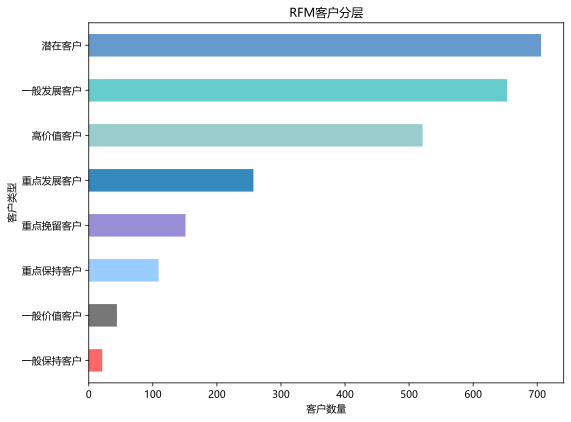

In [34]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 1. 中文字体配置
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 按系统调整
mpl.rcParams['axes.unicode_minus'] = False

# 2. 绘制图表
plt.figure(figsize=(9,6))
colors=['#FF6666','#777777','#99ccff','#988ed5','#348abd','#99cccc','#66cccc','#6699cc']

# 3. 绘制并调整布局
ax = RFM_result.plot(
    kind='barh',
    color=colors,
    title='RFM客户分层',
    xlabel='客户数量',    # 显式设置坐标轴标签
    ylabel='客户类型'
)

# 4. 优化标签显示
plt.tight_layout()
plt.subplots_adjust(left=0.25)  # 根据标签长度调整

# 5. 显示图表
plt.show()

根据RFM客户分层模型的结果，针对不同的客户类型，可以制定以下营销策略：

✨一般保持客户：可以定期发送一些常规的促销活动或优惠信息，以保持与客户的联系。同时，可以通过社交媒体、电子邮件等方式，向客户传递公司的品牌价值和品牌形象，以提高客户的忠诚度和满意度；
✨一般价值客户：可制定一些标准化的营销策略，如提供一些常规的优惠和促销活动，或提供一些标准化的服务。同时，通过一些营销手段，如邮件营销、短信营销等，吸引客户的注意力，提高客户满意度；
✨重点保持客户：需要制定个性化的营销策略，提供更优质的服务和产品。例如，可以提供定制化的产品或服务，或者提供专属的优惠和促销活动。同时，需要加强与客户的沟通和互动，建立更紧密的关系；
✨重点挽留客户：需要制定专门的挽留策略，了解客户的需求和不满，提供针对性的解决方案。例如，可以提供专业的售后服务、增值服务等方式，来提高客户的满意度和忠诚度；
✨重点发展客户：需要加强与客户的沟通和互动，对于重点发展的客户，需要多次进行上门拜访，了解客户的心声和实际需求，从而增加客户的黏性，以此达到营造更好的客情关系；
✨高价值客户：制定个性化营销策略，提供更优质的服务和产品。同时，加强与客户的沟通和互动，建立更紧密的关系，向客户提供一些具有前瞻性的产品和服务，吸引客户的注意力，提高客户留存率；
✨一般发展客户：制定一些标准化的营销策略，如提供一些常规的优惠和促销活动，或提供一些标准化的服务。还可以通过一些营销手段，如邮件营销、短信营销等，来吸引客户的注意力，提高客户的忠诚度；
✨潜在客户：制定一些基础营销策略，如提供一些基础的优惠和促销活动，同时，可通过一些营销手段，例如广告投放、社交媒体推广等，吸引客户的注意力，提高客户的转化率和留存率。

对于不同的客户类型，需要制定不同类型的营销策略，在制定营销策略时，需要注重客户的差异化需求和特点，以提高营销效果和客户满意度。